# Seaborn
You all need to know the basic plotting functions inside matplotlib. The ones in Pandas can be very handy as well.  None of these easily make production-ready figures though. For this, a great resource is [seaborn](http://seaborn.pydata.org/).  What's great is that it naturally works with Pandas dataframes. Here are a few examples lifted from the seaborn gallery

<Axes: xlabel='timepoint', ylabel='signal'>

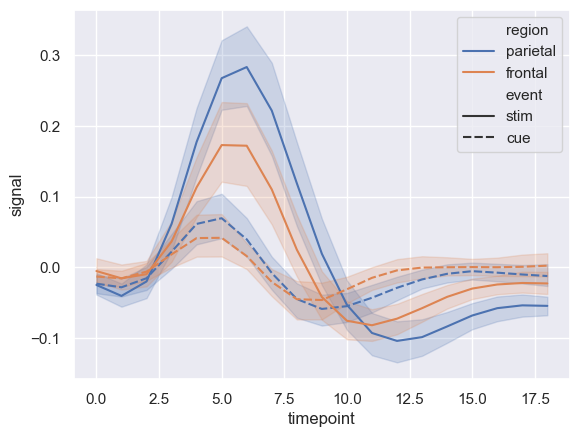

In [4]:
import seaborn as sns
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

<Axes: xlabel='year', ylabel='month'>

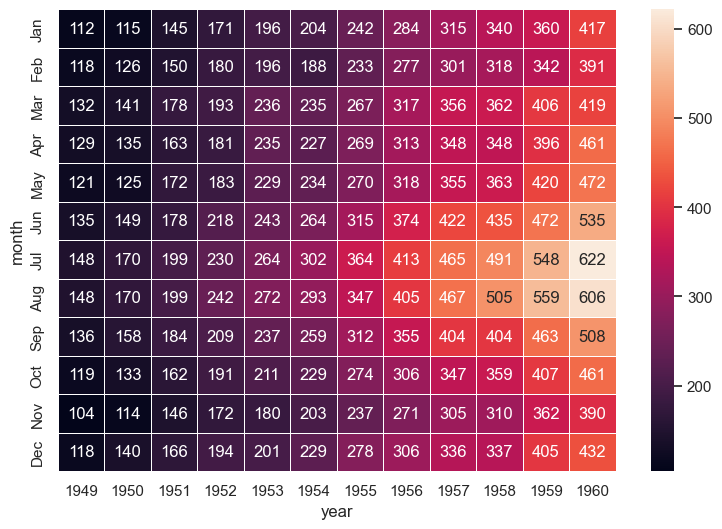

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot(index="month", columns="year", values="passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

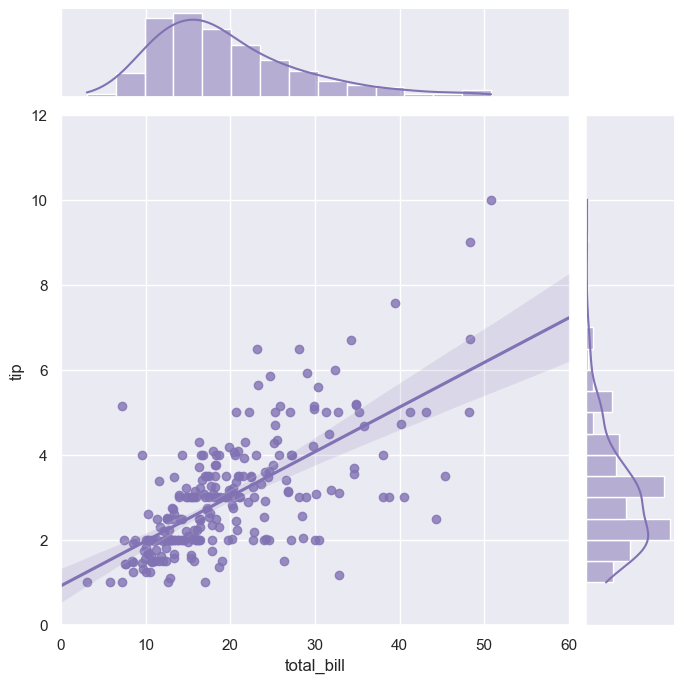

In [9]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

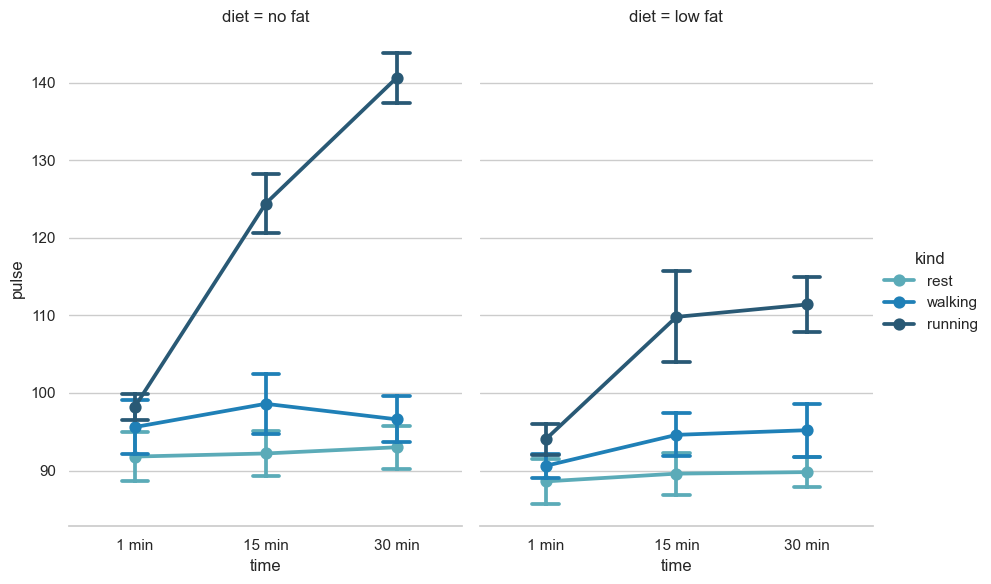

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example exercise dataset
exercise = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(
    data=exercise, x="time", y="pulse", hue="kind", col="diet",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)
g.despine(left=True)

Seaborn has two ways to do scatterplots that we'll use: [`lmplot`](http://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) and [`regplot`](http://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot). The `lmplot` function is a bit fancier and puts the output on a _FacteGrid_ rather than an axis, but also lets you have mulitple regressions running at the same time (e.g., groups using the `hue` parameter to split them). Grab your code from the Data Analysis problem set you just did and recreate several of the scatterplots, this time adding nice regression lines and eye-candy using seaborn.  

How about the bar plot?  We've got `catplot` to start off with there. _Note: If you've got seaborn 0.12 or higher, you now have a nice `errorbar` parameter_

In [12]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import requests #extra
import io #extra
from scipy import stats

csvfname='https://raw.githubusercontent.com/celstark/n247data/main/data/StarkData.csv'

s = requests.get(csvfname).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))



In [13]:
''' 1) compute 2 metrics from the data and store them in the data frame:
- LDI = pS_L - pS_F
- Recognition = pO_R - pO_F '''

data['LDI'] = data['pS_L'] -  data['pS_F']
data['Recognition'] = data['pO_R'] -  data['pO_F']

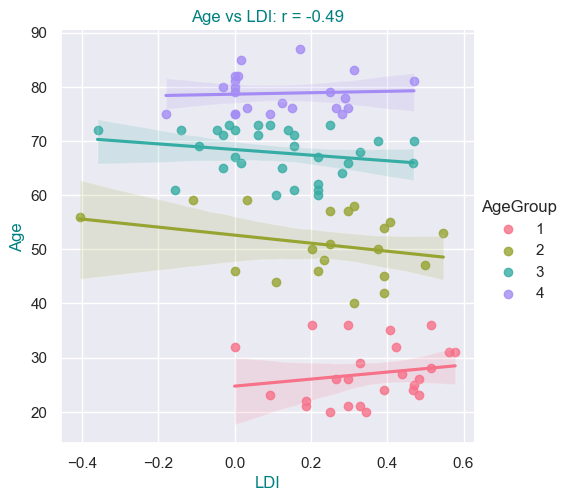

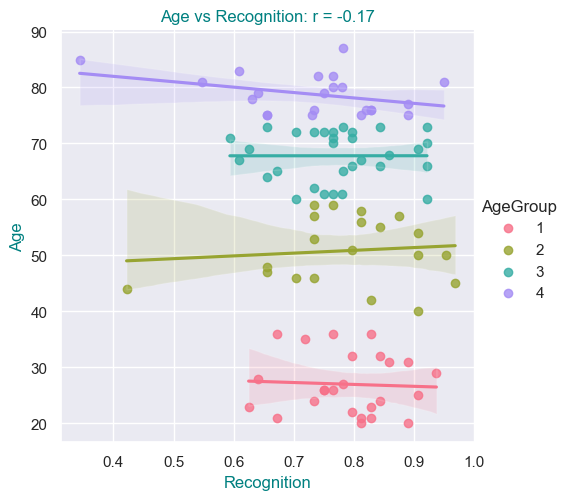

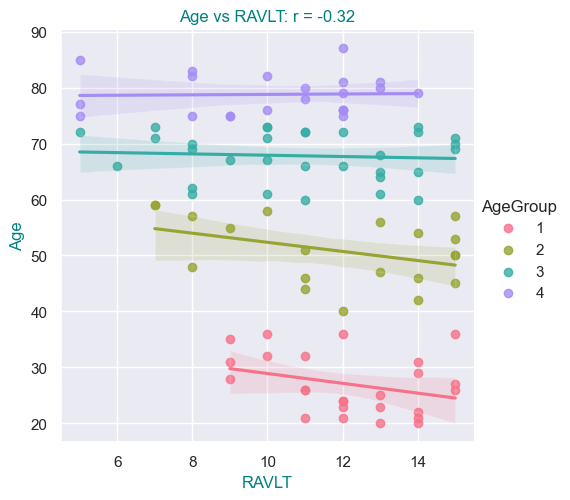

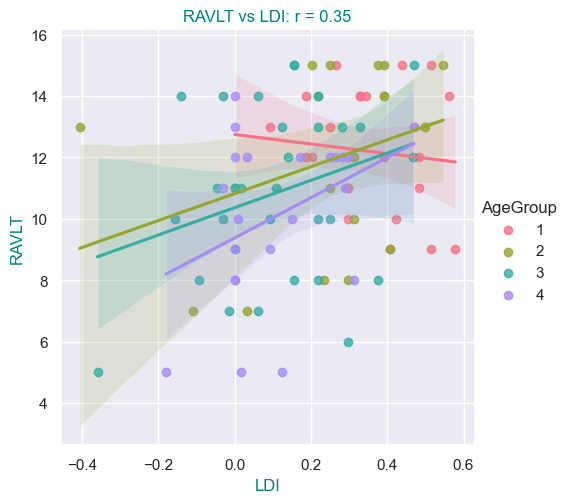

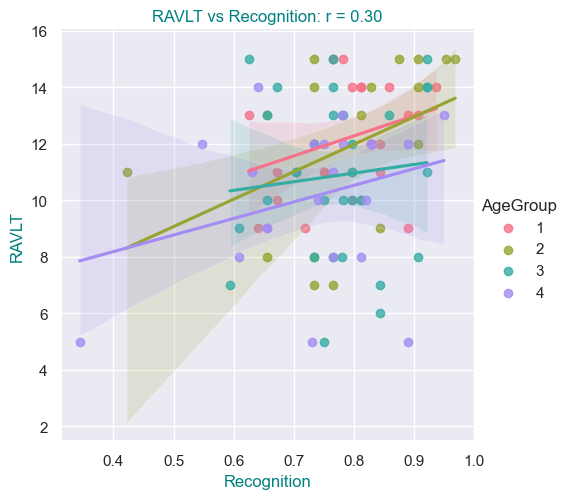

In [34]:
'''2 & 3) make scatter plots of:
- LDI vs. Age
- Recognition vs. Age
- RAVLT vs. Age
- LDI vs. RAVLT
- Recognition vs. RAVLT. Compute correlation coefficients + add titles. '''

def create_seaborn_scatterplot(col_list): #input is 2 columns we are plotting
    corr = data[col_list].corr(numeric_only=True).iloc[0,1] #compute correlation coefficient 
    x_val, y_val = col_list
    scatter_plot = sns.lmplot(data,x=x_val, y=y_val, scatter=True, hue="AgeGroup",palette="husl", height=5)
    plt.title(f'{y_val} vs {x_val}: r = {corr:.2f}', color='teal')
    plt.xlabel(f'{x_val}', color='teal')
    plt.ylabel(f'{y_val}', color='teal')
                            
    return 


create_seaborn_scatterplot(['LDI', 'Age'])
create_seaborn_scatterplot(['Recognition', 'Age'])
create_seaborn_scatterplot(['RAVLT', 'Age'])
create_seaborn_scatterplot(['LDI', 'RAVLT'])
create_seaborn_scatterplot(['Recognition', 'RAVLT'])



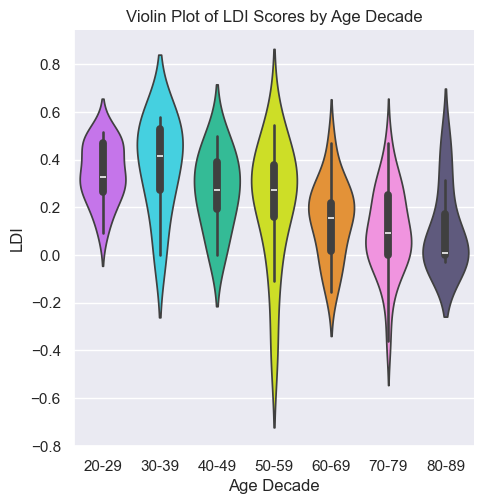

In [54]:
data['AgeDecade'] = pd.cut(data['Age'], bins = [19, 29,39,49,59,69,79, 89], labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])

'''4) box-plot of LDI scores by age decade ''' 

g = sns.catplot(x="AgeDecade",y = "LDI", hue ="AgeDecade", palette=['#cc61fe', '#2be4fa', '#1dd1a0', '#e6fc09', '#ff941c', '#ff85e9', '#5b5483'], data=data, kind="violin", errorbar=('ci', 95), legend_out=True)
g.set_axis_labels("Age Decade", "LDI")
g.set(title="Violin Plot of LDI Scores by Age Decade")

